In [1]:
%tensorflow_version

Currently selected TF version: 1.x
Available versions:
* 1.x
* 2.x


In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
len(x_train)

60000

In [8]:
len(y_test)

10000

In [9]:
y_train[543]

6

In [10]:
x_train[543]

array([[  0,   0,   1,   0,   0,   0,   3,   0,   0,   0,  31, 145, 133,
         70,  34,  47,  69, 108,  49,   0,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   1,   2,   0,   7,  84, 129, 135, 181, 213,
        225, 149, 255, 207, 197, 154, 123,  85,  28,   0,   1,   2,   0,
          0,   0],
       [  0,   0,   1,   0,   1,   0,   0, 135, 138, 121, 116,  90,  88,
        104,  64,  92,  89,  93, 113, 126, 133, 133,  39,   0,   2,   0,
          0,   0],
       [  0,   0,   1,   1,   2,   0,  73, 139, 121, 120, 119, 113, 184,
        192, 172, 176, 180, 118, 119, 116, 119, 126, 118,   2,   1,   2,
          0,   0],
       [  0,   0,   1,   1,   1,   0, 140, 133, 125, 124, 119, 109, 125,
        185, 170, 192, 143, 104, 121, 123, 121, 125, 139,  57,   0,   2,
          0,   0],
       [  0,   0,   0,   2,   0,  34, 143, 131, 128, 118, 118, 114, 104,
        148, 199, 161, 106, 110, 118, 115, 129, 134, 135, 111,   0,   2,
          0,   0],
       [  

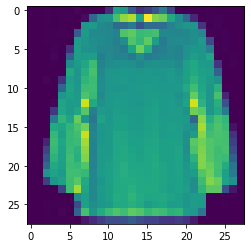

In [11]:
plt.imshow(x_train[543])

In [12]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
y_test[234]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [15]:
x_test[543]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.26666667, 0.99215686,
       0.79215686, 0.87843137, 0.89411765, 0.81960784, 0.74509804,
       0.94117647, 0.83529412, 0.89411765, 0.95686275, 0.31764706,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.31372549, 0.98039216, 0.80392157, 0.88235294,
       0.93333333, 0.91372549, 0.84313725, 0.92156863, 0.81176471,
       0.91764706, 0.99215686, 0.39607843, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.25490196,
       0.80784314, 0.77647059, 0.91372549, 0.9254902 , 0.95294118,
       0.96078431, 0.92156863, 0.87058824, 0.88627451, 0.94901

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [18]:
model = Sequential()
model.add(Dense(30, input_dim = 784, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'mse', optimizer = SGD(lr = 0.09), metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 24,900
Trainable params: 24,900
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train, y_train, batch_size=250, epochs=25)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0886 - accuracy: 0.1842
Epoch 2/25
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0847 - accuracy: 0.2738
Epoch 3/25
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0789 - accuracy: 0.3410
Epoch 4/25
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0715 - accuracy: 0.3918
Epoch 5/25
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0650 - accuracy: 0.4803
Epoch 6/25
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0590 - accuracy: 0.5415
Epoch 7/25
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0551 - accuracy: 0.5570
Epoch 8/25
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0525 - accuracy: 0.5798
Epoch 9/25
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0494 - accuracy: 0.6355
Epoch 10/25
60

In [23]:
result = model.predict_classes(x_test)
class_names[result[2345]]

'Dress'

In [0]:
def show(n):
  print('電子腦說這是 ', class_names[result[n]])
  plt.imshow(x_test[n].reshape(28, 28))

電子腦說這是  Trouser


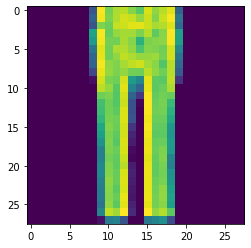

In [25]:
show(543)

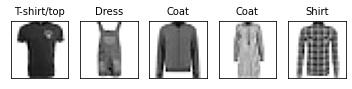

In [31]:
pick = np.random.choice(10000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[result[n]], fontsize=10)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')  